<h4 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h4>

<h1 class='lesson_title'>Exam 2 &mdash; Review Problems &mdash; Part II &mdash; Solutions</h1>

__Instructions.__
There are two parts to these review problems.
You should attempt the problems in Part I without a computer.
Part II is in this Jupyter Notebook.
Feel free to use your class materials and the course website to attempt the problems in this part.

## Problem 9

Stirling numbers of the first kind, written as $s(n,k)$, can be defined recursively by setting $s(0,0)=1$ and $s(n,0)=0$ for all $n>0$ and

\begin{equation*} 
s(n,k)=(n-1)s(n-1,k)+s(n-1,k-1) .
\end{equation*}

Write a function that will compute $s(n,k)$ using this recursion and compute $s(10,3)$ (You should get 2562156).

In [1]:
def stir(n, k):
    """
    Compute Stirling number of the first kind
    """
    # s(0, 0) = 1
    if n == 0:
        return 1
    
    # s(n, 0) = 0 for all n > 0
    elif k == 0:
        return 0
    
    # Otherwise
    else:
        return (n - 1) * stir(n - 1, k) + stir(n - 1, k - 1)
    
stir(10, 3)     

2562156

## Problem 10

Write code to make the following matrix:

\begin{equation*}
A=\left[ \begin{array}{cccccc}
0 & 1 & 2 & 3 & \cdots & 9\\
1 & 2 & 3 & 4 &\cdots &0\\
2 & 3 & 4  & 5&\cdots &1\\
&\vdots &&&\ddots &2\\
&\vdots &&&\ddots &\vdots\\
9 &0 & 1 &2& \cdots &8
\end{array}\right]
\end{equation*}

In [2]:
import numpy as np

A = np.zeros([10, 10])

for i in range(10):
    for j in range(10):
        A[i, j] = (i + j) % 10

print(A)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 2. 3. 4. 5. 6. 7. 8. 9. 0.]
 [2. 3. 4. 5. 6. 7. 8. 9. 0. 1.]
 [3. 4. 5. 6. 7. 8. 9. 0. 1. 2.]
 [4. 5. 6. 7. 8. 9. 0. 1. 2. 3.]
 [5. 6. 7. 8. 9. 0. 1. 2. 3. 4.]
 [6. 7. 8. 9. 0. 1. 2. 3. 4. 5.]
 [7. 8. 9. 0. 1. 2. 3. 4. 5. 6.]
 [8. 9. 0. 1. 2. 3. 4. 5. 6. 7.]
 [9. 0. 1. 2. 3. 4. 5. 6. 7. 8.]]


## Problem 11

Write scripts to graph $\sin x$ for $-\pi \leq x \leq \pi$ and 
the first two Taylor polynomial approximations 
$T_3 = x - \displaystyle\frac{x^3}{3!}$ and 
$T_5 = x - \displaystyle\frac{x^3}{3!}+\frac{x^5}{5!}$.

Use different colors for each of the three curves and 
label the axes and give a title.

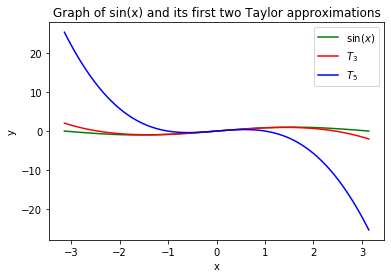

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

# Draw axes on the figure
ax = fig.add_subplot(1, 1, 1)

# Create list of values on the x-axis
t = np.linspace(-np.pi, np.pi, 100)

# Create list of corresponding y values
sin_t = [math.sin(x) for x in t]
taylor_3 = [x - (x ** 3) / 6 for x in t]
taylor_5 = [x - (x ** 3) + (x ** 5) / 120 for x in t]

# Plot the data on the axes
# label keyword arguments are used for legend
ax.plot(t, sin_t, 'g', label='$\sin(x)$')
ax.plot(t, taylor_3, 'r', label='$T_3$')
ax.plot(t, taylor_5, 'b', label='$T_5$')

# Label the axes
ax.set_xlabel('x')
ax.set_ylabel('y')

# Give the axes a legend
# Uses label keyword arguments in ax.plot
ax.legend()

# Give the plot a title
ax.set_title("Graph of sin(x) and its first two Taylor approximations")

# Show the figure
plt.show()

## Problem 12

Write code to generate the sequence of numbers `L = [1, 12, 123, 1234, ... , 123456789]`. Then write code to remove all the elements of this list that are divisible by 3.

In [4]:
L = []

# Create numbers as strings, then convert to integers
make_num = ''
for i in range(1, 10):
    make_num = f"{make_num}{str(i)}"
    num = int(make_num)
    L.append(num)

print("This is the first version of L")
print(L)
    
# Create list of numbers to remove    
removes = []        
for x in L:
    if x % 3 == 0:
        removes.append(x)

# Remove the numbers
for a in removes:
    L.remove(a)   

print("This is the final version of L")
print(L)

This is the first version of L
[1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789]
This is the final version of L
[1, 1234, 1234567]


## Problem 13

In this problem you are to use simulation to estimate the probability that two random points inside the unit circle (radius 1) are distance 1 from each other. To do this problem follow these steps:

 - Use the `random` package with the command `random.uniform(a, b)` to generate a list of 300 pseudo-randomly generated points inside the unit circle.

 - Generate a list of the distances between all pairs of elements from the list you made based on the first bullet-point.

 - Now compute the proportion of the paired distances that are smaller than 1. This gives our desired estimate.

In [5]:
# First bullet point
import random

points = []
# You could use a for loop here as well!
while len(points) < 300:
    # Generate random point (x, y)
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    
    # Check if (x, y) is inside the circle x^2 + y^2 = 1
    if x ** 2 + y ** 2 <= 1:
        points.append((x, y))

In [6]:
# Second bullet point
import math

dists = []

# Iterate over all pairs of points
for a in points:
    for b in points:
        
        # Don't compute distance between the same point
        if points.index(a) != points.index(b):
            
            # Distance formula
            d = math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)
            dists.append(d)

In [7]:
# Third bullet point
# Iterate over all distances
# Count the ones that are less than 1
counter = 0
for d in dists:
    if d <= 1:
        counter += 1
        
# Compute the fraction of distances less than 1
estimate_prob = counter / len(dists)

print(estimate_prob)

0.5756521739130435


## Problem 14

The website `fivethirtyeight.com` is a news website that makes careful use of statistics. It studies topics ranging from political polling data to sports data. They post a large amount of their data on the site `data.fivethirtyeight.com`. This problem comes from an article they wrote on NFL game predictions. The goal of this problem is to make a list of the average winning margin in games for each year. Accomplish this via the following steps.

 - Import the `xlwings` package. The file `nfl_538.xlsx` should be in the same folder as this Jupyter notebook. Load it into Python, and load the main sheet into Python.

 - Make a list consisting of all the values column B, which is all the season years. Then record the positions in this list where the season changes. This will be used below to gather the data for each year separately.

 - Make a list of the winning margin in each game, that is, the absolute value of the difference of the scores for each team. The scores are in columns M and N.

 - Now make a list of the average winning margins for each year.

 - Make a dictionary where the keys are years and the values are the average winning margin for that year. 

 - Use your dictionary from the previous bullet point to find four numbers: the average winning margin for all years in the 1970s, 1980s, 1990s, and 2000s.

In [8]:
# First bullet point
import xlwings as xw

wb = xw.Book('nfl_538.xlsx')        
sht = wb.sheets['nfl_538']   

In [9]:
# Second bullet point
season_list = sht.range('B2').expand('down').value
season_change_index = []

for i in range(len(season_list) - 1):
    if season_list[i] != season_list[i + 1]:
        season_change_index.append(i)

# Need to put the last index in
season_change_index.append(i + 1)

In [10]:
# Third bullet point
import numpy as np

team1_scrs = sht.range('M2').expand('down').value
team2_scrs = sht.range('N2').expand('down').value

diffs = []
for i in range(len(team1_scrs)):
    d = np.abs(team1_scrs[i] - team2_scrs[i])
    diffs.append(d)

In [11]:
# Fourth bullet point
ave_diffs = [] 
for i in range(len(season_change_index) - 1):
    s = (sum(diffs[season_change_index[i]:season_change_index[i+1]]) / 
         (season_change_index[i + 1] - season_change_index[i]))
    ave_diffs.append(s)
         
# Need to add the last year
s = (sum(diffs[season_change_index[-1]:len(diffs) + 1]) / 
     (-season_change_index[-1] + len(diffs) + 1))
ave_diffs.append(s)

In [12]:
# Fifth bullet point
year_scrs = {}

counter = 0
for index in season_change_index:
    yr = season_list[index]
    year_scrs[yr] = ave_diffs[counter]
    counter += 1

In [13]:
# Sixth bullet point
s = 0
for i in range(1970, 1980):
    s += year_scrs[i]
average_1970s = s / 10
print(average_1970s)

s = 0
for i in range(1980, 1990):
    s += year_scrs[i]
average_1980s = s / 10
print(average_1980s)

s = 0
for i in range(1990, 2000):
    s += year_scrs[i]
average_1990s = s / 10
print(average_1990s)

s = 0
for i in range(2000, 2010):
    s += year_scrs[i]
average_2000s = s / 10
print(average_2000s)

12.223291229240616
11.878478702764367
11.48873026091641
11.808196318308676
